In [2]:
from google.colab import files
files.upload()

Saving Medical Cost Personal Datasets.zip to Medical Cost Personal Datasets.zip


{'Medical Cost Personal Datasets.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00pi;Y\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x00\x00Medical Cost Personal Datasets/Medical Cost Personal Datasets/PK\x03\x04\x14\x00\x00\x00\x08\x00pi;Y\xe7d\xc0\x82\xb1?\x00\x00L\xd9\x00\x00K\x00\x00\x00Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv\x85}\xdb\xae-\xbb\x8d\xdd\xbb\x81\xf5\'\x1b\x05\x89\xa2n\x9f\xe3$;n#\xdd6\xe0\xd3A\x92\xbf\x0f\x07\xa5*Q\xa2\xdc\xf6\xe3q\xedZ\xb3$^\x06\xc9A\xf2\xcf\x7f\xf9\xfd\xeb\x8f\xdf\xff\xf7\xd7\x7f\xfb\x8f\xbf\xfe\xfa\xef\xff\xf6\xd7\x7f\xff\x1f\xff\xf8\xfd\xb7_\x7f\xfc\xc7\xdf\xff\xd7\xef\x7f\xfc\xfa\xc7\xef\xbf\xfc\xf5\xef\x7f\x93\xff\xfc\xe7\x7f\xfc\xe5\xf7\x1f?\x7f\x8a\xfd\xd7\xff\xfc\xfd\x1f\x7f\xfe\xf7\xdf\xbf\xa8>\xfdW\xf8\xf5\xff~\xff\xf1\xeb\x8f\xbf\xff\xef\xff\xfc\xb7\xff\xf3\xfb\x8f\xff\xfc\x15Kk\xfctby\xb2\xfd\xd2\xe7Rzj\xfd\x15\x7f\xfd\xed\xef\xe3\xb9\xdf\x7f\xc6s\x95\xf2\x933\xa5\x9f?\xd1\xf7\xdc\xaf\xb4?\xc4\xcc\xfd\x

In [3]:
!unzip Medical\ Cost\ Personal\ Datasets.zip

Archive:  Medical Cost Personal Datasets.zip
   creating: Medical Cost Personal Datasets/Medical Cost Personal Datasets/
  inflating: Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv  


In [5]:
import pandas as pd

df = pd.read_csv('Medical Cost Personal Datasets/Medical Cost Personal Datasets/insurance.csv')

In [6]:
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [7]:
# Missing Values
print('\nMissing Values:\n', df.isnull().sum())


Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Dropping Duplicates
df_clean = df.drop_duplicates()
print('\nDuplicates:\n', df.duplicated().sum())


Duplicates:
 1


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


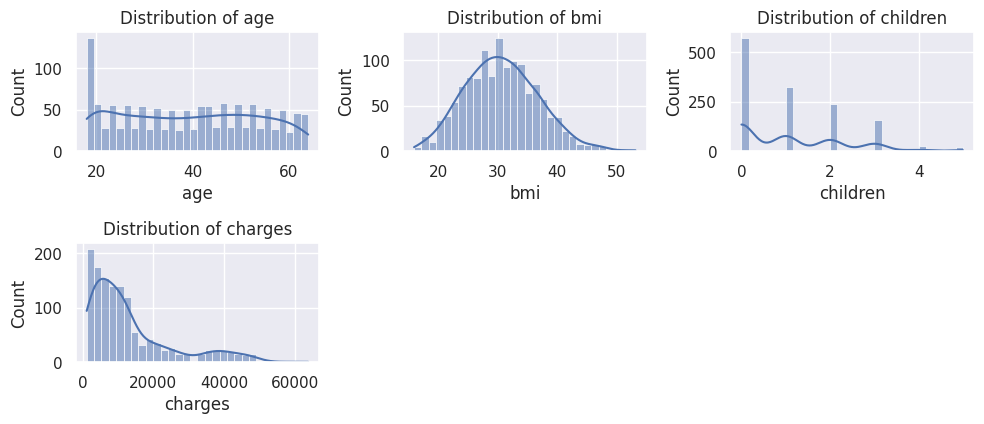

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Columns to extract numerical data
data_cols = ['age', 'bmi', 'children', 'charges']

# Subplotting
plt.figure(figsize=(10, 6))

for i, col in enumerate(data_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [13]:
# Initial observations:
# 1. Charges have a right-skewed distribution
# 2. BMI is mostly normally distributed, but a few high values exist
# 3. Age is a pretty flat distribution
# 4. Most individuals have 0 children, and the count decreases significantly as the number of children increases
# 5. No missing values found in the dataset